In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)
pd.set_option("display.max_columns", None)
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [2]:
df=pd.read_csv("datasets/train_data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#drop loan_id
df.drop("Loan_ID", inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [5]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# categorical cols
cat=df.select_dtypes("object").columns.to_list()
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [7]:
# numerical cols
num=df.select_dtypes(["int", "float"]).columns.to_list()
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

**imputing null values**

In [8]:
# cat with null values
for i in cat:
    if df[i].isna().sum() != 0:
        print(f"{i}:{df[i].mode().tolist()[0]}")

Gender:Male
Married:Yes
Dependents:0
Self_Employed:No


In [9]:
# imputing cat null with mode
for i in cat:
    if df[i].isna().sum() != 0:
        df[i].fillna(df[i].mode().tolist()[0], inplace=True)

In [10]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
# num with null values
for i in num:
    if df[i].isna().sum() != 0:
        print(i)

LoanAmount
Loan_Amount_Term
Credit_History


In [12]:
# imputing num null with mode
for i in num:
    if df[i].isna().sum() != 0:
        df[i].fillna(df[i].median(), inplace=True)

In [13]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## EDA

**cat count plot**

In [14]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

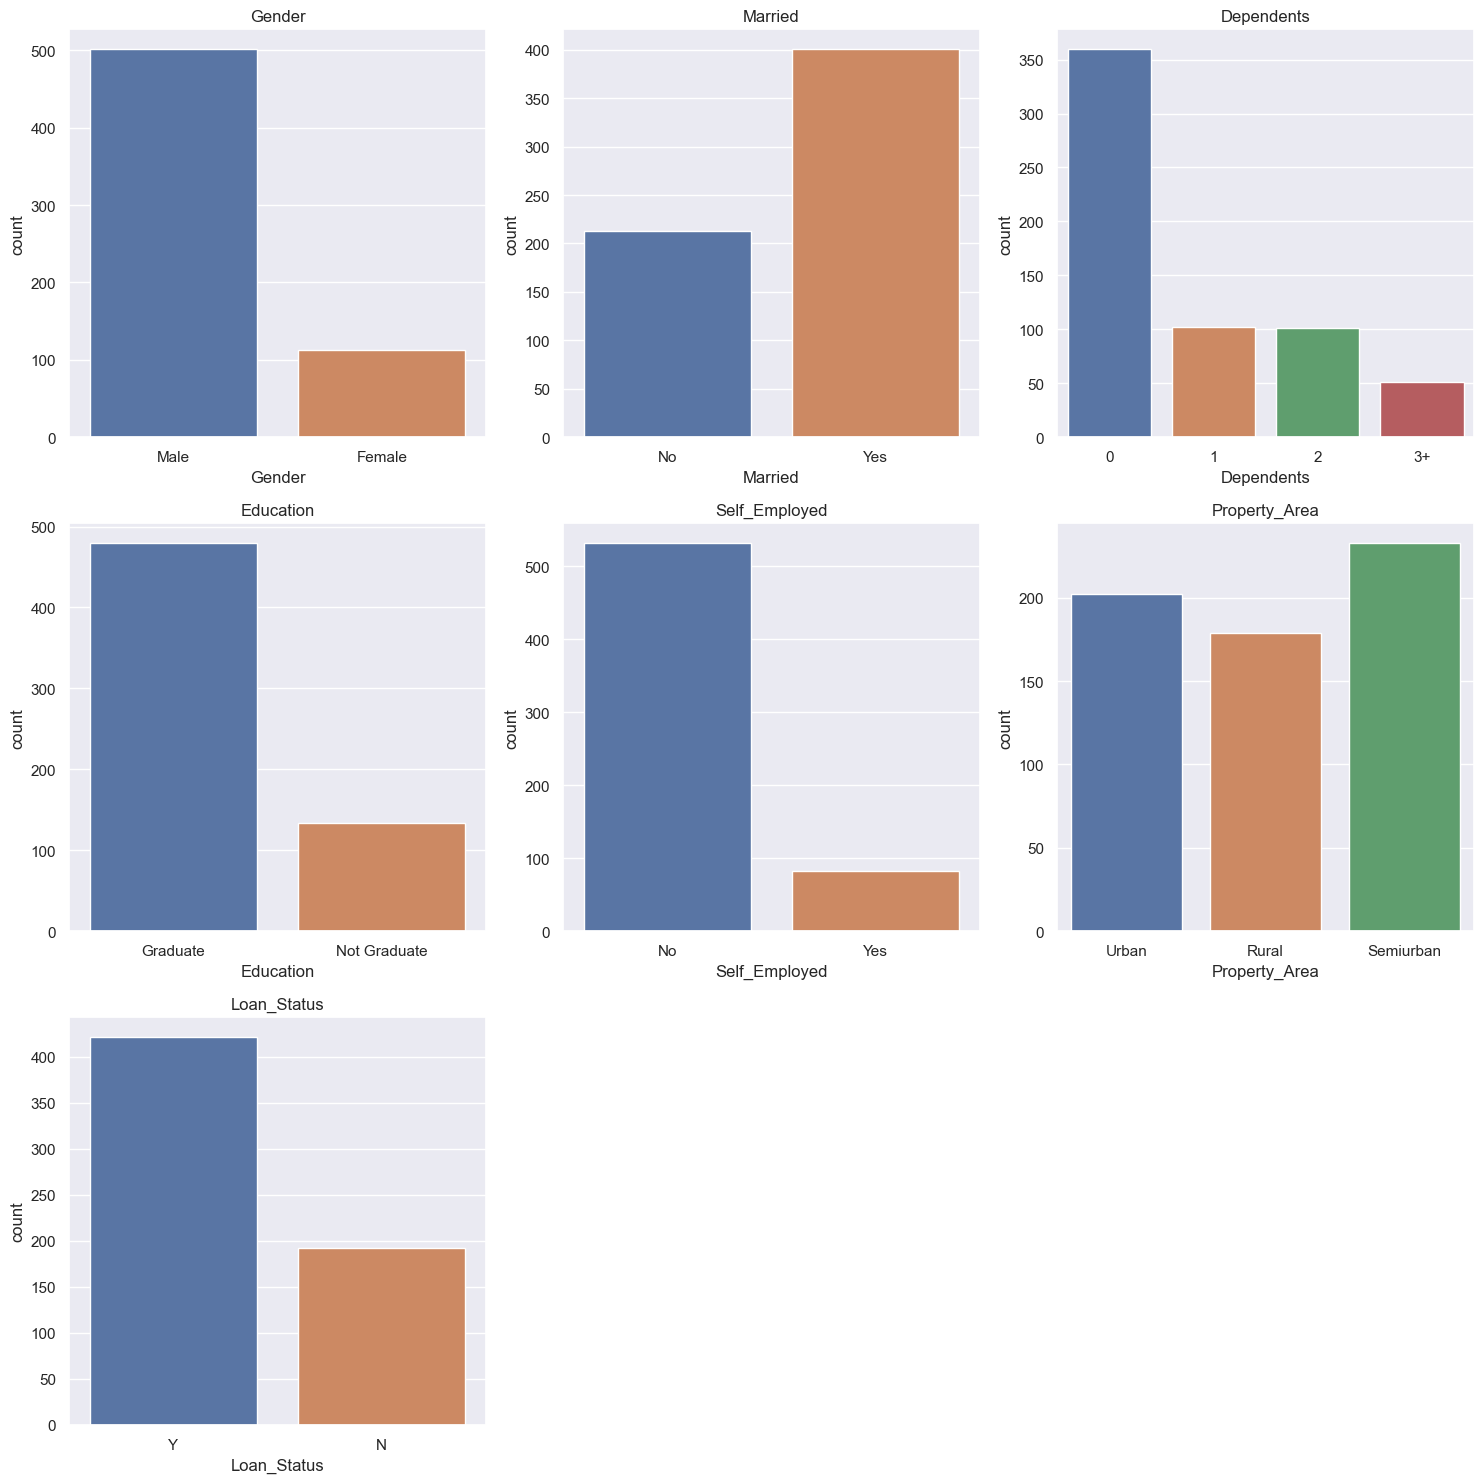

In [15]:
# Create a figure with subplots
num_cols = len(cat)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for the top 6 values of each categorical variable using Seaborn
for i, var in enumerate(cat):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=0)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

**num boxplot**

In [16]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

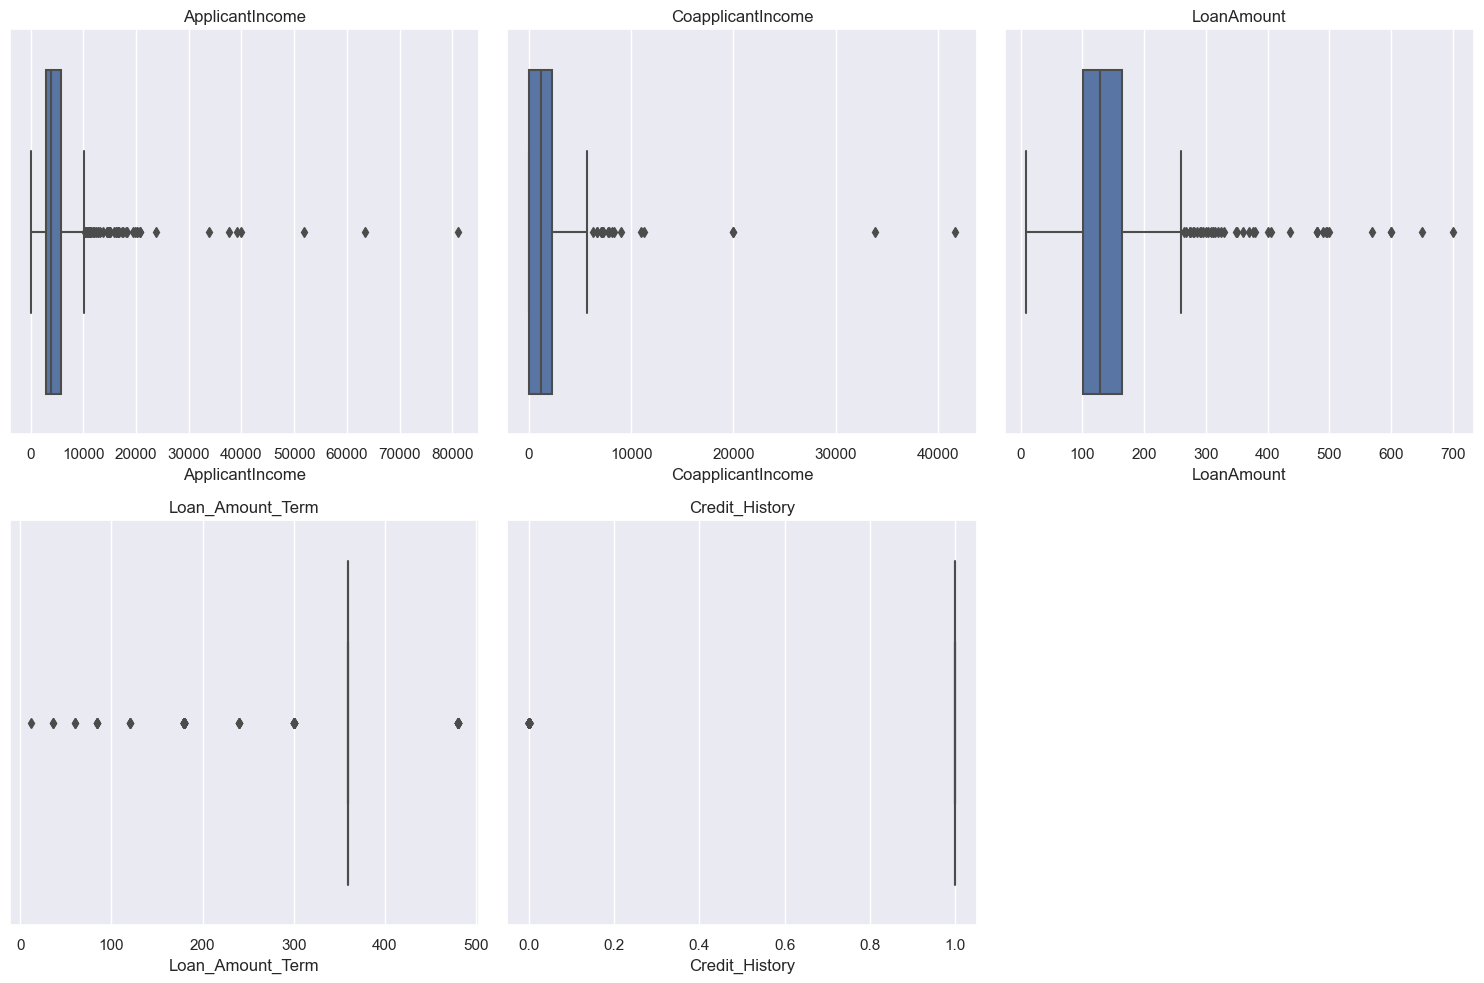

In [17]:
# Create a figure with subplots
num_cols = len(num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each numerical variable using Seaborn
for i, var in enumerate(num):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

**Output col vs numercal cols**

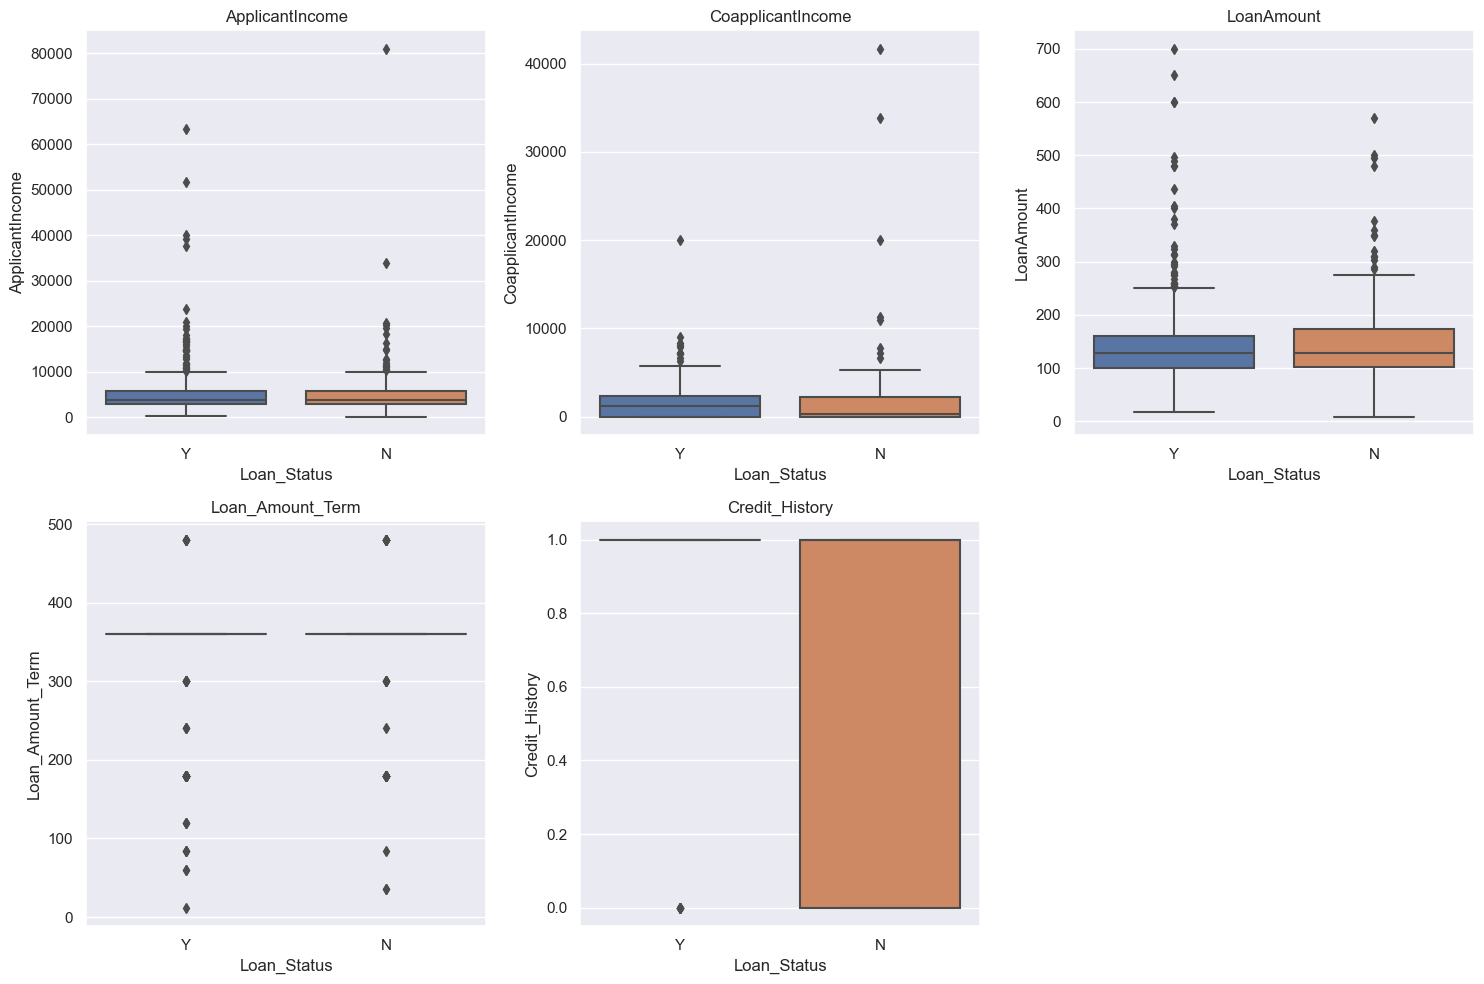

In [18]:
# Create a figure with subplots
num_cols = len(num)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(num):
    sns.boxplot(y=var, x='Loan_Status', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

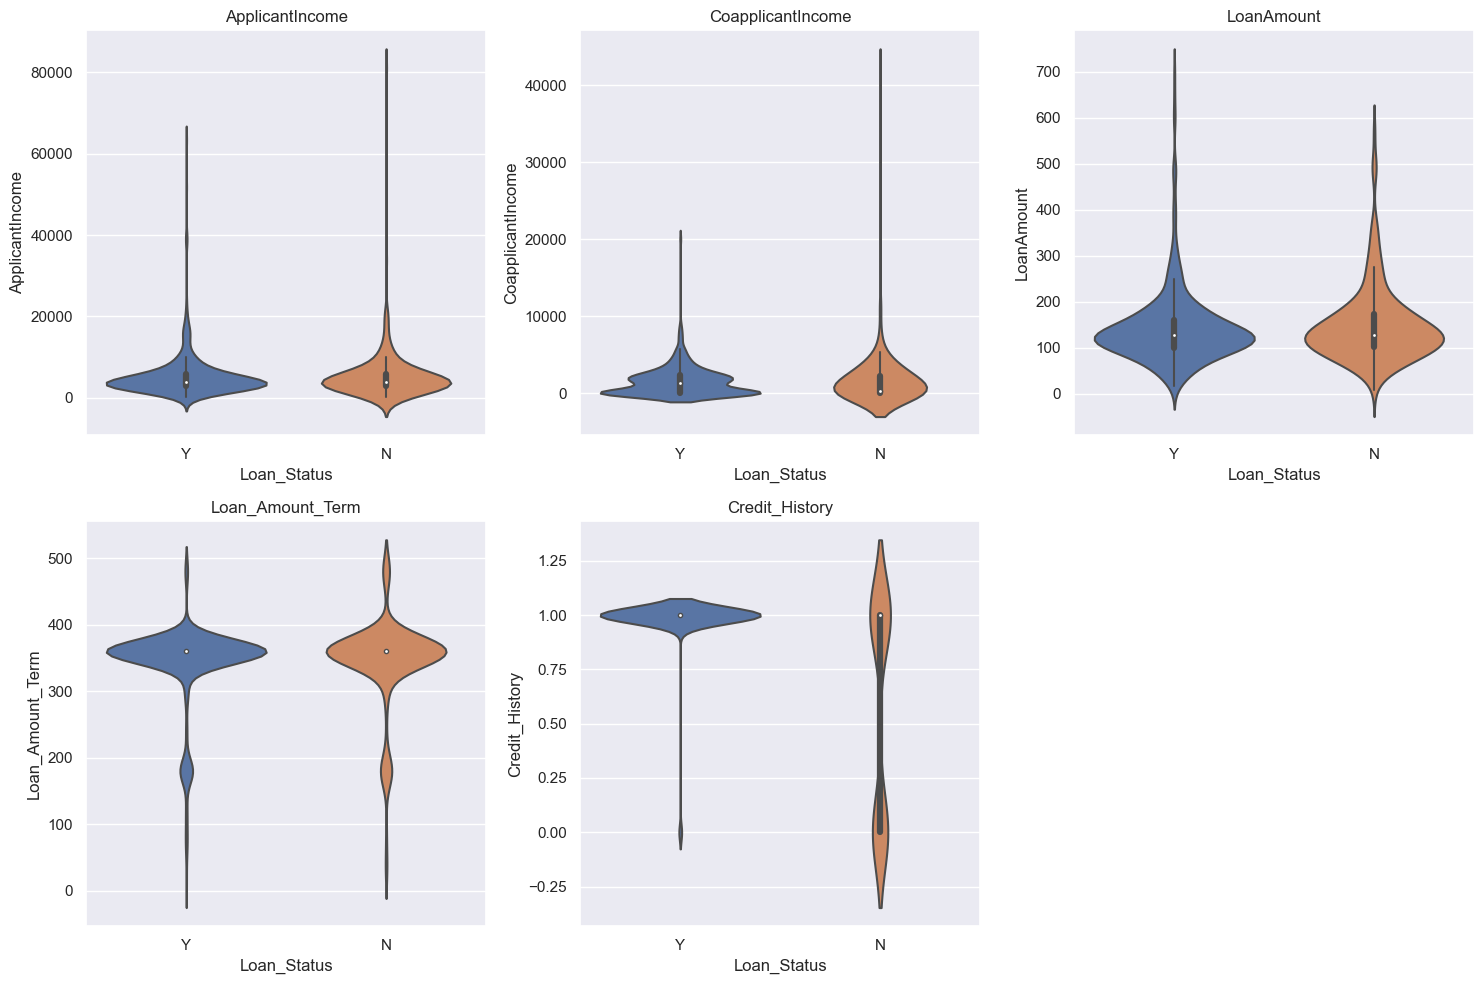

In [19]:
# Create a figure with subplots
num_cols = len(num)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(num):
    sns.violinplot(y=var, x='Loan_Status', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

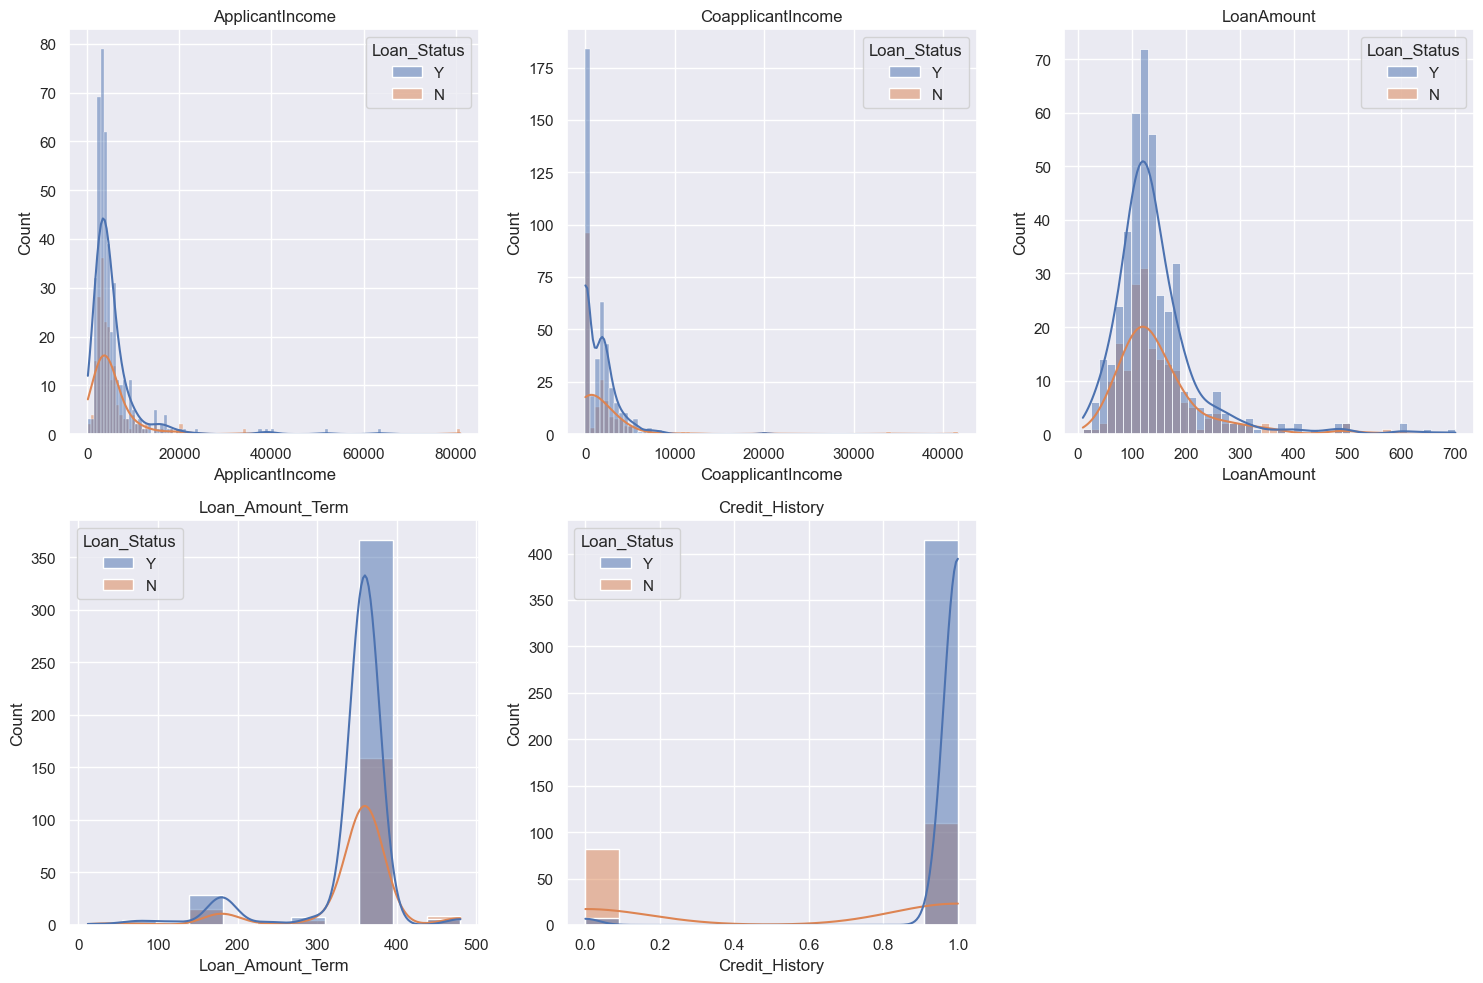

In [20]:
# Create a figure with subplots
num_cols = len(num)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(num):
    sns.histplot(data=df, x=var, 
                 hue='Loan_Status', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

**Output col vs categorical col**

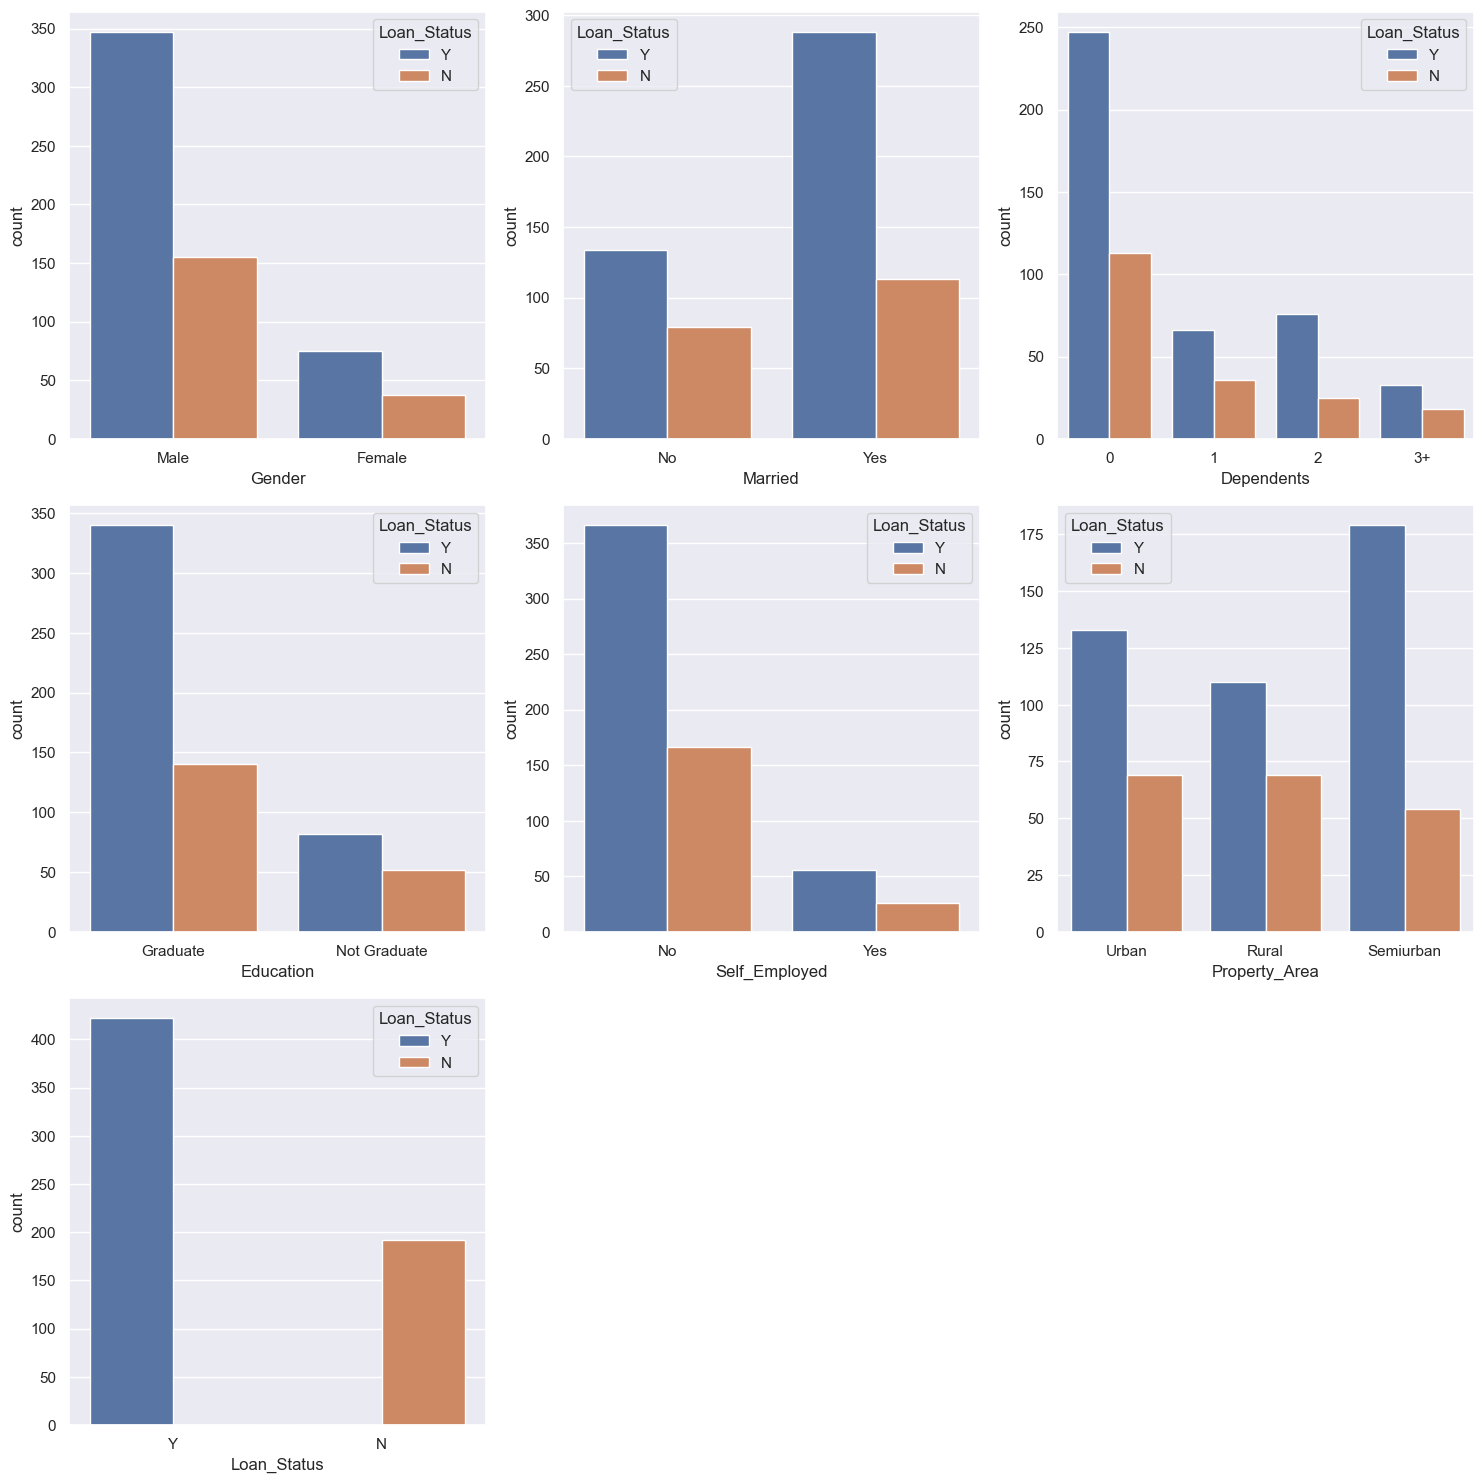

In [21]:
# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat):
    top_values = df[var].value_counts().nlargest(6).index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, hue='Loan_Status', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=0)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

## Label encoding for object datatypes

In [22]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [23]:
# cat cols with there unique values
for i in cat:
    print(f"{i}: {df[i].unique()}")

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']
Loan_Status: ['Y' 'N']


In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat:
    df[i]=le.fit_transform(df[i])

    # Print the column name and the unique encoded values
    print(f"{i}: {df[i].unique()}")

Gender: [1 0]
Married: [0 1]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 0 1]
Loan_Status: [1 0]


**Heatmap**

<Axes: >

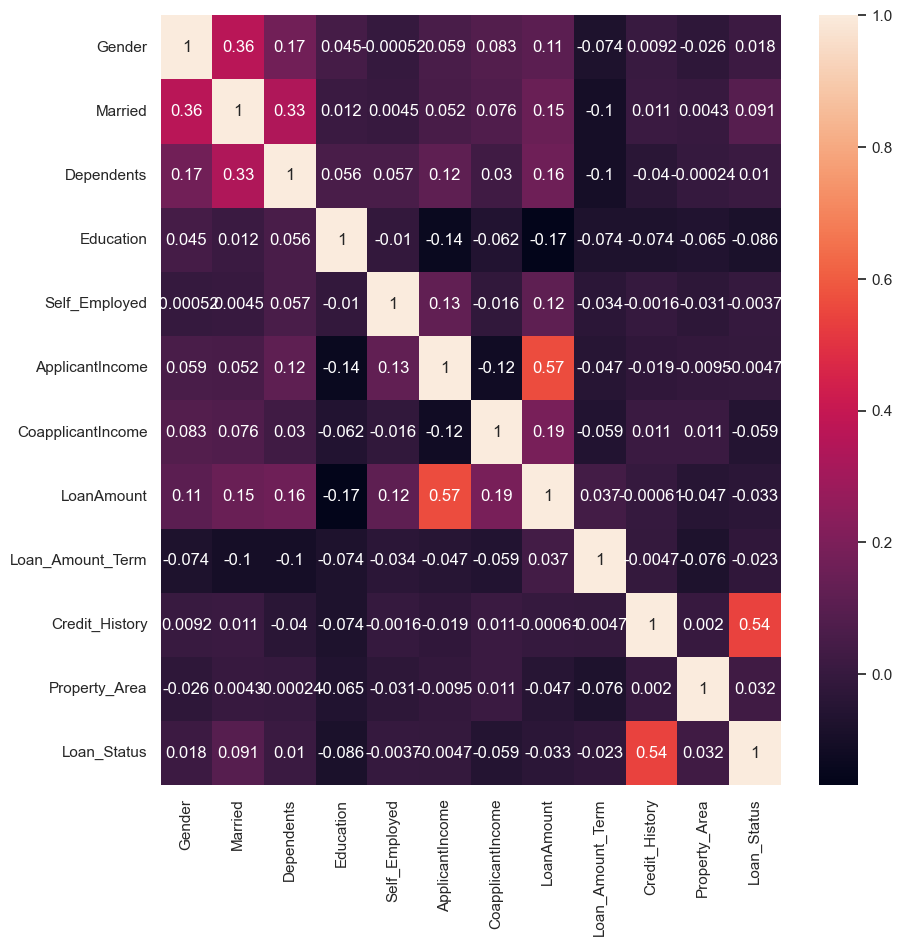

In [25]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), fmt=".2g", annot=True)

# ML model development

## Without Hyperparameter tuning 

## Decision Tree Classifier

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [27]:
#input data and output data
X=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


### Removing Outlier from Train Data using Z-score

In [28]:
num

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [29]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

**Prediction**

In [31]:
# passing the test data
y_pred=dtree.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0])

**Metrics**

In [32]:
# Metrics on (y_test, y_prediction)

dtree_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",dtree_acc)
dtree_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",dtree_precision)
dtree_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",dtree_recall)
dtree_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",dtree_F1)

Accuracy:-  65.04
precision:-  0.81
recall:-  0.64
F1-score:-  0.72


confusion matrix:-  [[26 13]
 [30 54]]


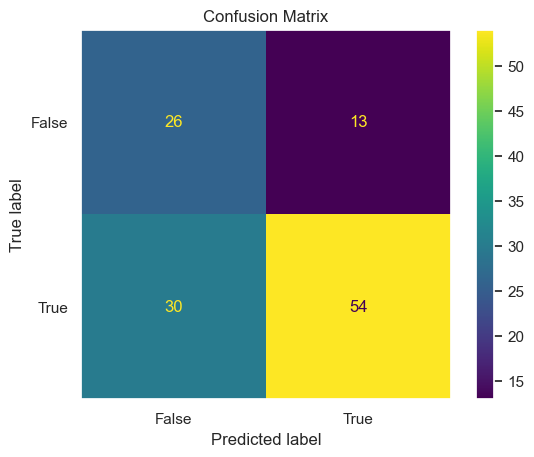

True negative: 26
False postive: 13
False negative: 30
True postive: 54


In [33]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

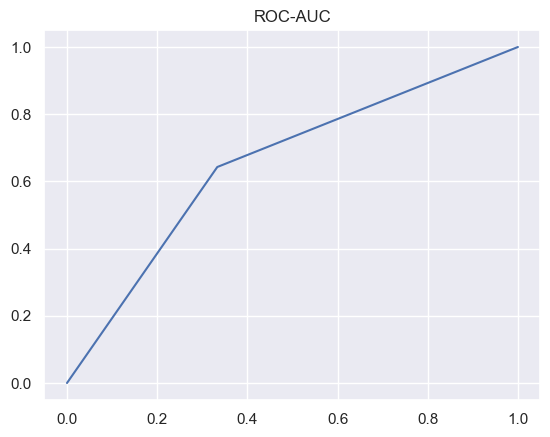

In [34]:
# s8 ROC-AUC curve
y_pred_proba=dtree.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Logistic Regression

In [35]:
#input data and output data
X=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


### Removing Outlier from Train Data using Z-score

In [36]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [37]:
#  Training the model
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [38]:
#s5 prediction
y_pred=logreg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

**Metrics**

In [39]:
# Metrics on (y_test, y_prediction)

logreg_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",logreg_acc)
logreg_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",logreg_precision)
logreg_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",logreg_recall)
logreg_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",logreg_F1)

Accuracy:-  83.74
precision:-  0.82
recall:-  0.98
F1-score:-  0.89


confusion matrix:-  [[21 18]
 [ 2 82]]


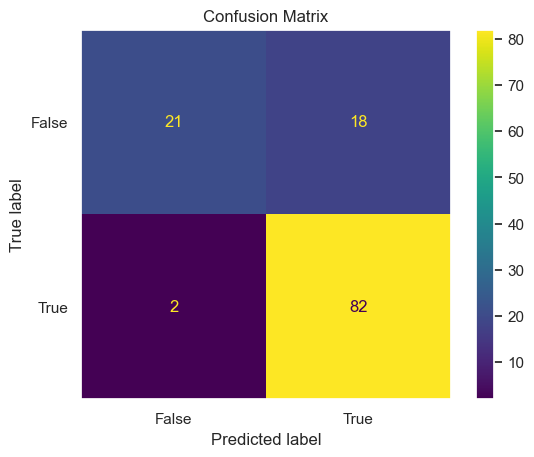

True negative: 21
False postive: 18
False negative: 2
True postive: 82


In [40]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

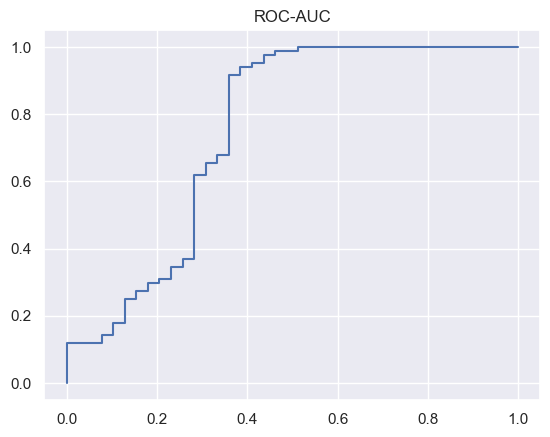

In [41]:
#  ROC-AUC curve
y_pred_proba=logreg.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Naive Bayes

In [42]:
#input data and output data
X=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


### Removing Outlier from Train Data using Z-score

In [43]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [44]:
# s4 Training the model
from sklearn.naive_bayes import GaussianNB
gNB=GaussianNB()
gNB.fit(X_train, y_train)

GaussianNB()

In [45]:
#s5 prediction
y_pred=gNB.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

**Metrics**

In [46]:
# Metrics on (y_test, y_prediction)
gNB_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",gNB_acc)
gNB_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",gNB_precision)
gNB_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",gNB_recall)
gNB_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",gNB_F1)

Accuracy:-  82.11
precision:-  0.83
recall:-  0.93
F1-score:-  0.88


confusion matrix:-  [[23 16]
 [ 6 78]]


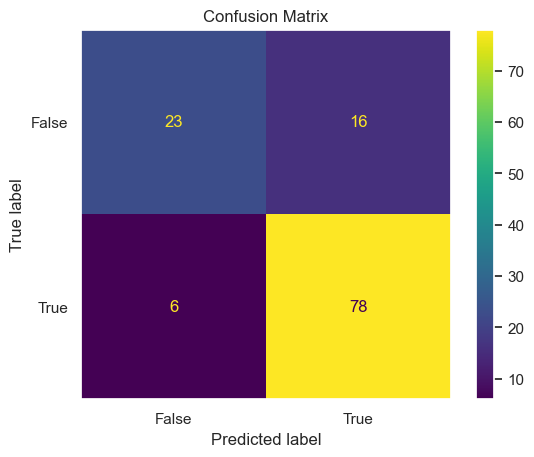

True negative: 23
False postive: 16
False negative: 6
True postive: 78


In [47]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

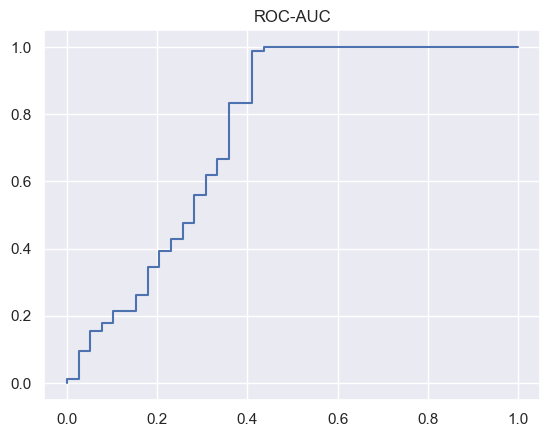

In [48]:
#  ROC-AUC curve
y_pred_proba=gNB.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## KNN

In [49]:
#input data and output data
X=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


### Removing Outlier from Train Data using Z-score

In [50]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [51]:
#  Training the model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [52]:
# prediction
y_pred=knn.predict(X_test.values)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Metrics**

In [53]:
# Metrics on (y_test, y_prediction)
knn_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",knn_acc)
knn_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",knn_precision)
knn_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",knn_recall)
knn_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",knn_F1)

Accuracy:-  61.79
precision:-  0.68
recall:-  0.83
F1-score:-  0.75


confusion matrix:-  [[ 6 33]
 [14 70]]


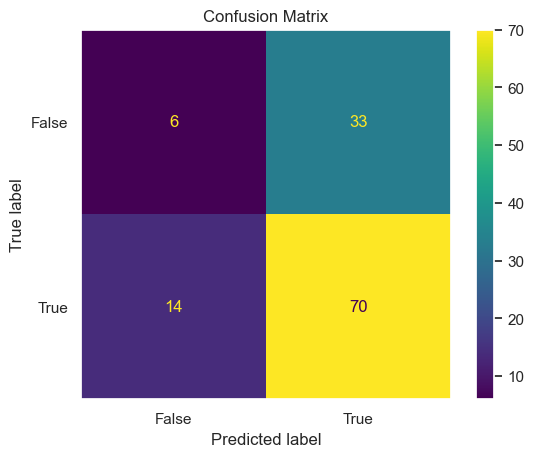

True negative: 6
False postive: 33
False negative: 14
True postive: 70


In [54]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

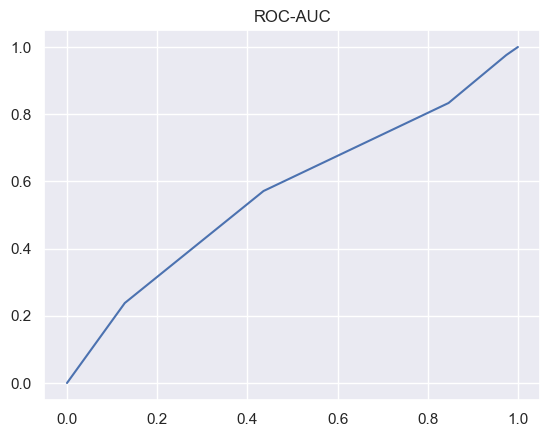

In [55]:
#  ROC-AUC curve
y_pred_proba=knn.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Random Forest

In [56]:
#input data and output data
X=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


### Removing Outlier from Train Data using Z-score

In [57]:
# outlier analysis
from scipy import stats #all statistics related

z_scores = np.abs(stats.zscore(X_train[num]))
threshold = 3
outlier_indices = np.where(z_scores > threshold)[0]
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

**Model development**

In [58]:
#  Training the model
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
# prediction
y_pred=rfc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

**Metrics**

In [60]:
# Metrics on (y_test, y_prediction)
rfc_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",rfc_acc)
rfc_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",rfc_precision)
rfc_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",rfc_recall)
rfc_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",rfc_F1)

Accuracy:-  82.11
precision:-  0.82
recall:-  0.94
F1-score:-  0.88


confusion matrix:-  [[22 17]
 [ 5 79]]


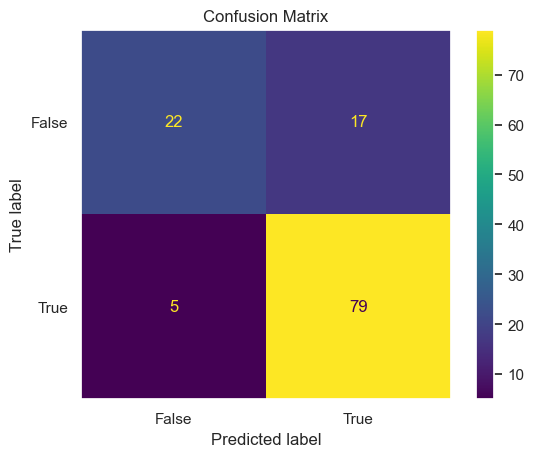

True negative: 22
False postive: 17
False negative: 5
True postive: 79


In [61]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

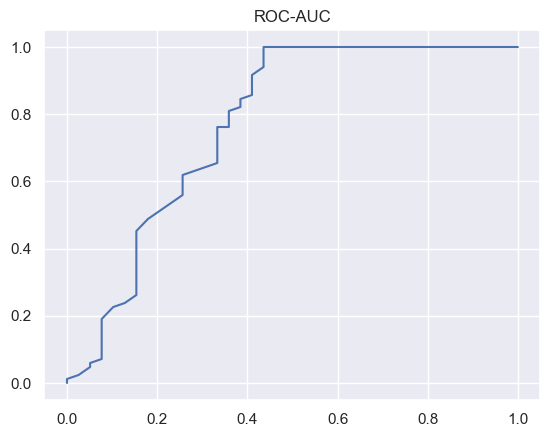

In [62]:
#  ROC-AUC curve
y_pred_proba=rfc.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Metrices df

**Combine Metrices df of models without hyperparameters**

In [63]:
dict1={"Accuracy":[dtree_acc,logreg_acc,gNB_acc,knn_acc,rfc_acc],
      "Precision":[dtree_precision,logreg_precision,gNB_precision,knn_precision,rfc_precision],
      "Recall":[dtree_recall,logreg_recall,gNB_recall,knn_recall,rfc_recall],
      "F1-score":[dtree_F1,logreg_F1,gNB_F1,knn_F1,rfc_F1]}

dict1=pd.DataFrame(dict1,index=['Decision Tree','Logistic Reg.','Naive Bayes','KNN','Random Forest'])
dict1

,Accuracy,Precision,Recall,F1-score
Decision Tree,65.04,0.81,0.64,0.72
Logistic Reg.,83.74,0.82,0.98,0.89
Naive Bayes,82.11,0.83,0.93,0.88
KNN,61.79,0.68,0.83,0.75
Random Forest,82.11,0.82,0.94,0.88


## With Hyperparameter Tuning

## Decision Tree Classifier

In [64]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [65]:
#input data and output data
X=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


In [66]:
#loading the base model
from sklearn.tree import DecisionTreeClassifier
base_dtree=DecisionTreeClassifier()
base_dtree

DecisionTreeClassifier()

In [67]:
# dic with hyper params
param={
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42],
    'splitter': ["best", "random"]
}

In [68]:
# performing grid search on base model
grid_dtree=GridSearchCV(base_dtree, param, scoring="accuracy", cv=5, verbose=False)
grid_dtree

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=False)

In [69]:
# fitting the grid search model
grid_dtree.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=False)

In [70]:
grid_dtree.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=0,
                       splitter='random')

In [71]:
grid_dtree.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 0,
 'splitter': 'random'}

In [72]:
grid_dtree.best_score_

0.7943104514533086

## Developing decision tree with best parameters

In [73]:
dtree2=DecisionTreeClassifier(criterion= 'gini',
                             max_depth= 3,
                             min_samples_leaf= 2,
                             min_samples_split= 2,
                             random_state= 0,
                             splitter= 'random')
dtree2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=0,
                       splitter='random')

In [74]:
y_pred=dtree2.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [75]:
# Metrics
dtree2_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",dtree2_acc)
dtree2_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",dtree2_precision)
dtree2_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",dtree2_recall)
dtree2_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",dtree2_F1)

Accuracy:-  86.18
precision:-  0.83
recall:-  1.0
F1-score:-  0.91


confusion matrix:-  [[22 17]
 [ 0 84]]


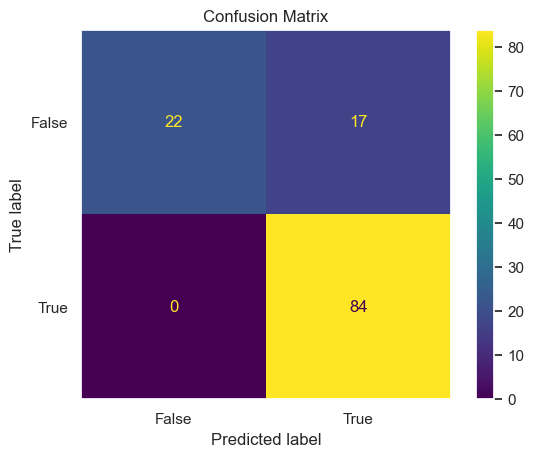

True negative: 22
False postive: 17
False negative: 0
True postive: 84


In [76]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

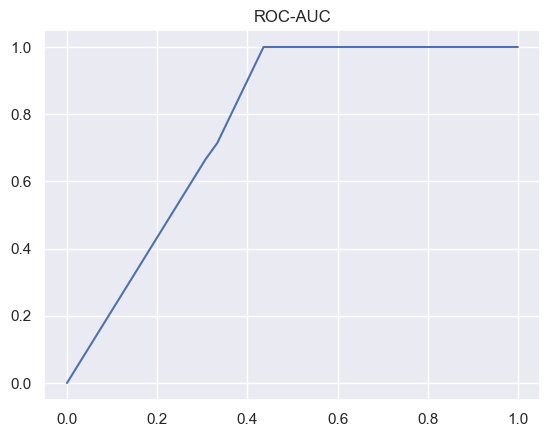

In [77]:
# ROC-AUC curve
y_pred_proba=dtree2.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Logistic Regression

In [78]:
#input data and output data
X=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


In [79]:
#loading the base model
from sklearn.linear_model import LogisticRegression
base_logreg=LogisticRegression()
base_logreg

LogisticRegression()

In [80]:
# dic with hyper params
params={'C': [1.0, 1.2, 1.4, 1.5], 
 'dual': [False, True],
 'fit_intercept': [True, False], 
 'max_iter': [20, 40, 60, 80, 100],
 'multi_class': ["auto", "ovr", "multinomial"], 
 'penalty': ['l1', 'l2', 'elasticnet', None], 
 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
 'warm_start':[True, False]}

In [81]:
# performing grid search on base model
grid_logreg=GridSearchCV(base_logreg, params, scoring="accuracy", cv=5, verbose=False)
grid_logreg

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 1.2, 1.4, 1.5], 'dual': [False, True],
                         'fit_intercept': [True, False],
                         'max_iter': [20, 40, 60, 80, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             scoring='accuracy', verbose=False)

In [82]:
# fitting the grid search model
grid_logreg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 1.2, 1.4, 1.5], 'dual': [False, True],
                         'fit_intercept': [True, False],
                         'max_iter': [20, 40, 60, 80, 100],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga'],
                         'warm_start': [True, False]},
             scoring='accuracy', verbose=False)

In [83]:
grid_logreg.best_estimator_

LogisticRegression(C=1.2, warm_start=True)

In [84]:
grid_logreg.best_params_

{'C': 1.2,
 'dual': False,
 'fit_intercept': True,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'lbfgs',
 'warm_start': True}

In [85]:
grid_logreg.best_score_

0.7983714698000413

## Developing Logistic Regression with best parameters

In [86]:
logreg2=LogisticRegression(C= 1.2,
                        dual= False,
                        fit_intercept= True,
                        max_iter= 100,
                        multi_class= 'auto',
                        penalty= 'l2',
                        solver= 'lbfgs',
                        warm_start= True)
logreg2.fit(X_train,y_train)

LogisticRegression(C=1.2, warm_start=True)

In [87]:
y_pred=logreg2.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [88]:
# Metrics
logreg2_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",logreg2_acc)
logreg2_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",logreg2_precision)
logreg2_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",logreg2_recall)
logreg2_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",logreg2_F1)

Accuracy:-  86.18
precision:-  0.83
recall:-  1.0
F1-score:-  0.91


confusion matrix:-  [[22 17]
 [ 0 84]]


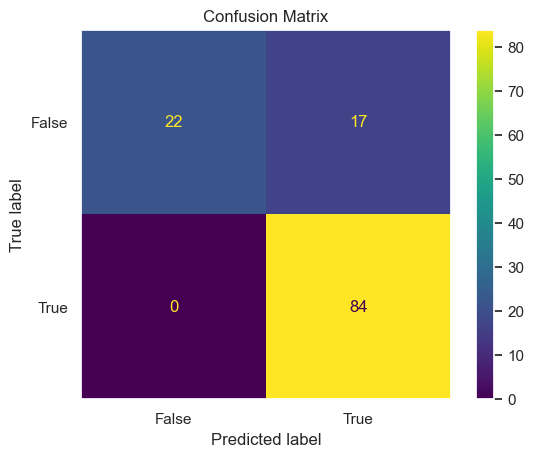

True negative: 22
False postive: 17
False negative: 0
True postive: 84


In [89]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

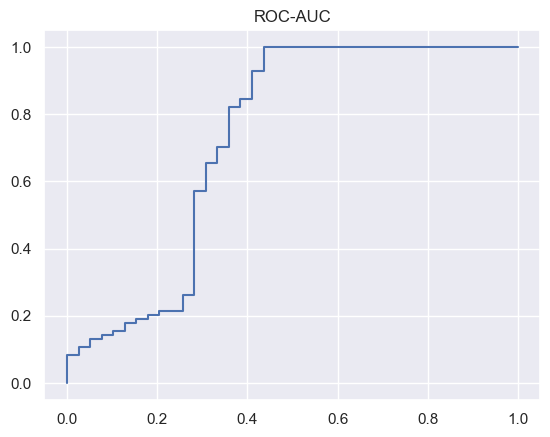

In [90]:
# ROC-AUC curve
y_pred_proba=logreg2.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Naive Bayes

In [91]:
#input data and output data
X=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


In [92]:
#loading the base model
from sklearn.naive_bayes import GaussianNB
base_gNB=GaussianNB()
base_gNB

GaussianNB()

In [93]:
# dic with hyper params
param_gNB={ 'var_smoothing': [0.001,0.01] }

In [94]:
# performing grid search on base model
grid_gNB=GridSearchCV(base_gNB, param_gNB, scoring="accuracy", cv=5, verbose=False)
grid_gNB

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.001, 0.01]}, scoring='accuracy',
             verbose=False)

In [95]:
# fitting the grid search model
grid_gNB.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GaussianNB(),
             param_grid={'var_smoothing': [0.001, 0.01]}, scoring='accuracy',
             verbose=False)

In [96]:
grid_gNB.best_estimator_

GaussianNB(var_smoothing=0.001)

In [97]:
grid_gNB.best_params_

{'var_smoothing': 0.001}

In [98]:
grid_gNB.best_score_

0.6803339517625232

## Developing Naive Bayes with best parameters

In [99]:
gNB2=GaussianNB(var_smoothing= 0.001)
gNB2.fit(X_train,y_train)

GaussianNB(var_smoothing=0.001)

In [100]:
y_pred=gNB2.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [101]:
# Metrics
gNB2_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",gNB2_acc)
gNB2_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",gNB2_precision)
gNB2_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",gNB2_recall)
gNB2_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",gNB2_F1)

Accuracy:-  62.6
precision:-  0.66
recall:-  0.92
F1-score:-  0.77


confusion matrix:-  [[ 0 39]
 [ 7 77]]


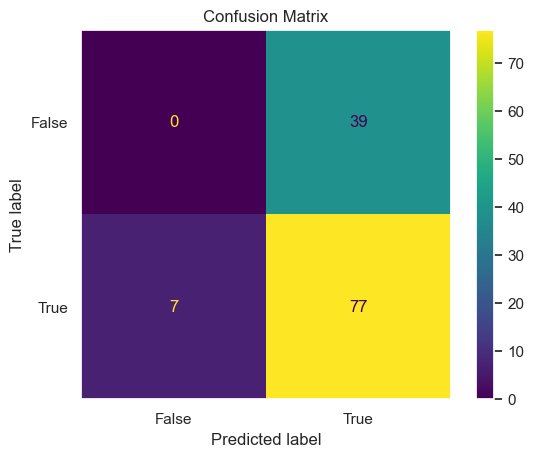

True negative: 0
False postive: 39
False negative: 7
True postive: 77


In [102]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

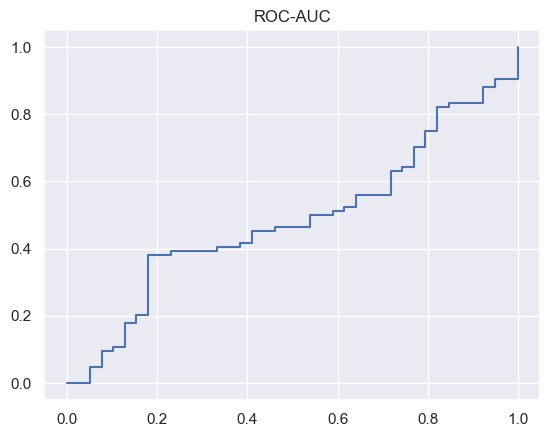

In [103]:
# ROC-AUC curve
y_pred_proba=gNB2.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## KNN

In [104]:
#input data and output data
X=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


In [105]:
#loading the base model
from sklearn.neighbors import KNeighborsClassifier
base_knn=KNeighborsClassifier()
base_knn

KNeighborsClassifier()

In [106]:
# dic with hyper params
param_knn={
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'leaf_size': [10, 20, 30, 40, 50],
 'n_neighbors':[2,3,4,5,6,7],
 'p': [1,2,3,4,5],
 'weights': ['uniform', 'distance']
}

In [107]:
# performing grid search on base model
grid_knn=GridSearchCV(base_knn, param_knn, scoring="accuracy", cv=5, verbose=False)
grid_knn

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6, 7],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=False)

In [108]:
# fitting the grid search model
grid_knn.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6, 7],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=False)

In [109]:
grid_knn.best_estimator_

KNeighborsClassifier(leaf_size=10, n_neighbors=7, p=1)

In [110]:
grid_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 7,
 'p': 1,
 'weights': 'uniform'}

In [111]:
grid_knn.best_score_

0.6253555967841683

## Developing KNN with best parameters

In [112]:
knn2=KNeighborsClassifier(algorithm= 'auto',
                        leaf_size= 10,
                        n_neighbors= 7,
                        p= 1,
                        weights= 'uniform')
knn2.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=7, p=1)

In [113]:
y_pred=knn2.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [114]:
# Metrics
knn2_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",knn2_acc)
knn2_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",knn2_precision)
knn2_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",knn2_recall)
knn2_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",knn2_F1)

Accuracy:-  67.48
precision:-  0.71
recall:-  0.89
F1-score:-  0.79


confusion matrix:-  [[ 8 31]
 [ 9 75]]


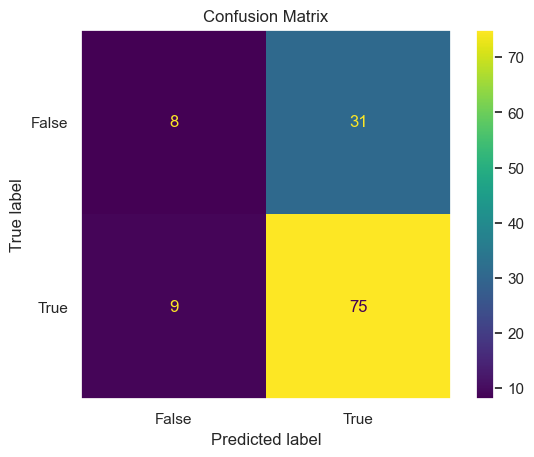

True negative: 8
False postive: 31
False negative: 9
True postive: 75


In [115]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

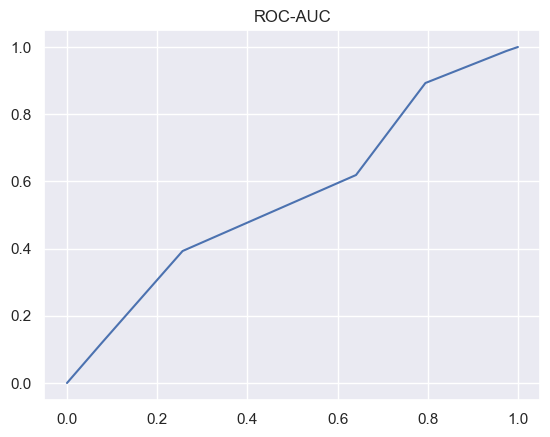

In [116]:
# ROC-AUC curve
y_pred_proba=knn2.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Random Forest

In [117]:
#input data and output data
X=df.drop("Loan_Status", axis=1)
y=df["Loan_Status"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


In [118]:
#loading the base model
from sklearn.ensemble import RandomForestClassifier
base_rfc=RandomForestClassifier()
base_rfc

RandomForestClassifier()

In [119]:
# dic with hyper params
param_rfc={
 'criterion': ["gini", "entropy", "log_loss"],
 'max_depth': [3, 4, 5, 6, 7, 8],
 'max_features': ["sqrt", "log2", None],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [2, 3, 4],
 'random_state': [0, 42]
}

In [120]:
# performing grid search on base model
grid_rfc=GridSearchCV(base_rfc, param_rfc, scoring="accuracy", cv=5, verbose=False)
grid_rfc

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=False)

In [121]:
# fitting the grid search model
grid_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=False)

In [122]:
grid_rfc.best_estimator_

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [123]:
grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'random_state': 42}

In [124]:
grid_rfc.best_score_

0.7983920841063699

## Developing Random Forest with best parameters

In [125]:
rfc2=RandomForestClassifier(criterion= 'gini',
                            max_depth= 5,
                            max_features= 'sqrt',
                            min_samples_leaf= 4,
                            min_samples_split= 2,
                            random_state= 42)
rfc2.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [126]:
y_pred=rfc2.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [127]:
# Metrics
rfc2_acc=round(accuracy_score(y_test,y_pred)*100,2)
print("Accuracy:- ",rfc2_acc)
rfc2_precision=round(precision_score(y_test,y_pred),2)
print("precision:- ",rfc2_precision)
rfc2_recall=round(recall_score(y_test,y_pred),2)
print("recall:- ",rfc2_recall)
rfc2_F1=round(f1_score(y_test,y_pred),2)
print("F1-score:- ",rfc2_F1)

Accuracy:-  86.18
precision:-  0.83
recall:-  1.0
F1-score:-  0.91


confusion matrix:-  [[22 17]
 [ 0 84]]


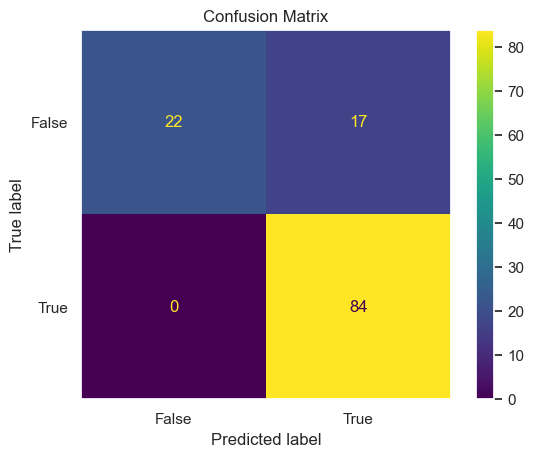

True negative: 22
False postive: 17
False negative: 0
True postive: 84


In [128]:
#  confusion metrix
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix:- ",cm)

dis=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False,True])
dis.plot()
plt.grid(False)
plt.title("Confusion Matrix")
plt.show()

tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

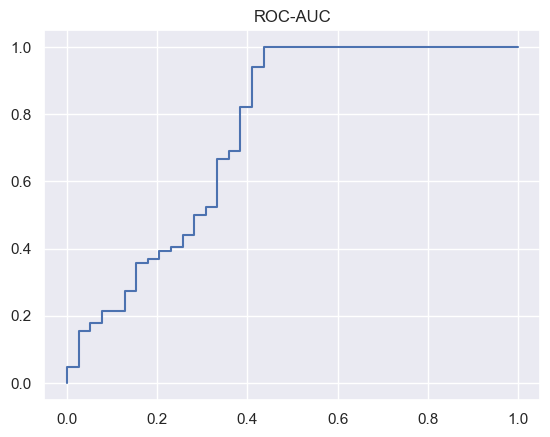

In [129]:
# ROC-AUC curve
y_pred_proba=rfc2.predict_proba(X_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC-AUC")
plt.show()

## Metrices2 df

**Combine Metrices dataframe of models with hyperparameters**

In [130]:
dict2={"Accuracy":[dtree2_acc,logreg2_acc,gNB2_acc,knn2_acc,rfc2_acc],
      "Precision":[dtree2_precision,logreg2_precision,gNB2_precision,knn2_precision,rfc2_precision],
      "Recall":[dtree2_recall,logreg2_recall,gNB2_recall,knn2_recall,rfc2_recall],
      "F1-score":[dtree2_F1,logreg2_F1,gNB2_F1,knn2_F1,rfc2_F1]}

dict2=pd.DataFrame(dict2,index=['Decision Tree','Logistic Reg.','Naive bayes','KNN','Random Forest'])
dict2 # dataframe of model metrices with hyperparameters

,Accuracy,Precision,Recall,F1-score
Decision Tree,86.18,0.83,1.00,0.91
Logistic Reg.,86.18,0.83,1.00,0.91
Naive bayes,62.60,0.66,0.92,0.77
KNN,67.48,0.71,0.89,0.79
Random Forest,86.18,0.83,1.00,0.91


In [177]:
dict1 # dataframe of model metrices WITHOUT hyperparameters

,Accuracy,Precision,Recall,F1-score
Decision Tree,65.04,0.81,0.64,0.72
Logistic Reg.,83.74,0.82,0.98,0.89
Naive Bayes,82.11,0.83,0.93,0.88
KNN,61.79,0.68,0.83,0.75
Random Forest,82.11,0.82,0.94,0.88


In [ ]:
# Random forest performs as a best model in both the cases

## Selecting the best model

In [133]:
rfc2

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [134]:
import pickle
pickle.dump(rfc2, open("Loan_prediction_model.pkl","wb"))

# Working with Test file

### Preprocessing and EDA of Test data

In [135]:
test_df=pd.read_csv("datasets/test_data.csv")
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [136]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [137]:
#drop loan_id
test_df.drop("Loan_ID", inplace=True, axis=1)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 31.7+ KB


In [139]:
test_df.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [140]:
# categorical cols
cat_test=test_df.select_dtypes("object").columns.to_list()
cat_test

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [141]:
# numerical cols
num_test=test_df.select_dtypes(["int", "float"]).columns.to_list()
num_test

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

**imputing null values**

In [142]:
# cat with null values
for i in cat_test:
    if test_df[i].isna().sum() != 0:
        print(f"{i}:{test_df[i].mode().tolist()[0]}")

Gender:Male
Dependents:0
Self_Employed:No


In [144]:
# imputing cat null with mode
for i in cat_test:
    if test_df[i].isna().sum() != 0:
        test_df[i].fillna(test_df[i].mode().tolist()[0], inplace=True)

In [146]:
test_df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [147]:
# num with null values
for i in num_test:
    if test_df[i].isna().sum() != 0:
        print(i)

LoanAmount
Loan_Amount_Term
Credit_History


In [148]:
# imputing num null with mode
for i in num_test:
    if test_df[i].isna().sum() != 0:
        test_df[i].fillna(test_df[i].median(), inplace=True)

In [149]:
test_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Label encoding for object datatypes in Test data

In [150]:
cat_test

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [151]:
# cat cols with there unique values
for i in cat_test:
    print(f"{i}: {test_df[i].unique()}")

Gender: ['Male' 'Female']
Married: ['Yes' 'No']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Semiurban' 'Rural']


In [152]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat_test:
    test_df[i]=le.fit_transform(test_df[i])

    # Print the column name and the unique encoded values
    print(f"{i}: {test_df[i].unique()}")

Gender: [1 0]
Married: [1 0]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 1 0]


**Heatmap**

<Axes: >

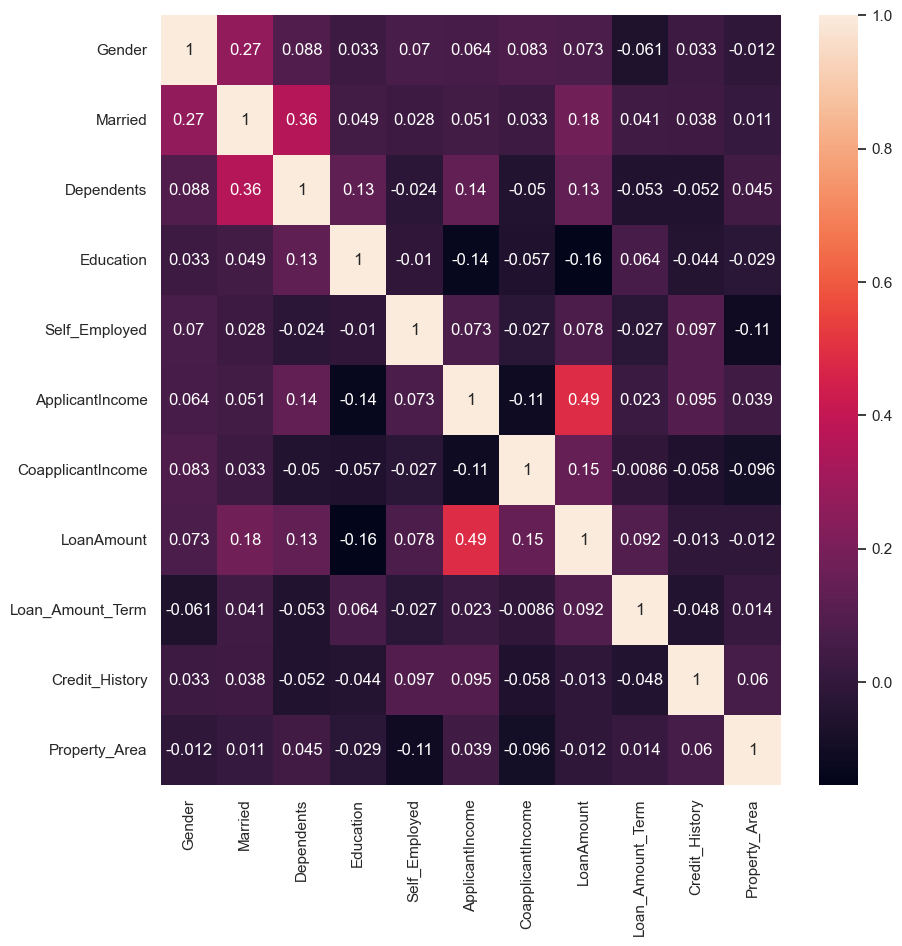

In [154]:
plt.figure(figsize=(10,10))
sns.heatmap(test_df.corr(), fmt=".2g", annot=True)

In [155]:
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


# Loading the model (pkl file) 

In [158]:
#loading the ml model from .pkl file
ml_model=pickle.load(open("Loan_prediction_model.pkl", "rb"))
ml_model

RandomForestClassifier(max_depth=5, min_samples_leaf=4, random_state=42)

In [168]:
# passing the test data to the model
ml_model_pred=ml_model.predict(test_df)
ml_model_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

# Creating Submission file

In [165]:
# creating submission dataframe
sub_df=pd.DataFrame()

In [166]:
tst_file=pd.read_csv("datasets/test_data.csv")
sub_df["Loan_ID"]=tst_file["Loan_ID"]

In [174]:
sub_df["Loan_Status"]=ml_model_pred
sub_df["Loan_Status"]=sub_df["Loan_Status"].map({1:"Y", 0:"N"})

In [175]:
sub_df

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [176]:
sub_df.to_csv("Loan_prediction_model_submission_file.csv")